In [152]:
from sqlalchemy import create_engine
import pandas as pd

#Datos de conexión
usuario='EquipoB'

contraseña="E1q2u3i4p5oB"
host='212.227.90.6'
puerto=3306
nombre_base_datos='EquipB'

#Crear la URL de la conexión
url_conexion=f"mysql+mysqlconnector://{usuario}:{contraseña}@{host}:{puerto}/{nombre_base_datos}"

try:
    #Crear el engine de SQLAlchemy
    engine=create_engine(url_conexion)
    cnx=engine.connect()

    print("Conexión correcta")

except Exception as e:
    print(f"Error al conectar con SQLAlchemy: {e}")
    
#Cargar Vista_finances
query=f"SELECT * FROM vista_finances"

try:
    df_finanzas = pd.read_sql(query, cnx)
    print(f"Vista cargada correctamente.")
except Exception as e:
    print(f"Error al cargar la vista:{e}")

#Cerrar la conexión
cnx.close()

Conexión correcta
Vista cargada correctamente.


## EDA

Comprobación de los primeros registros del dataframe y la información clave de los campos

In [153]:
df_finanzas.head()

,id,age,job,marital,education,faltante,balance,housing,loan
0,1,59,admin.,married,secondary,0,2343,1,0
1,3,56,admin.,married,secondary,0,45,0,0
2,4,41,technician,married,secondary,0,1270,1,0
3,5,55,services,married,secondary,0,2476,1,0
4,6,54,admin.,married,tertiary,0,184,0,0


In [154]:
df_finanzas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         11162 non-null  int64 
 1   age        11162 non-null  int64 
 2   job        11162 non-null  object
 3   marital    11162 non-null  object
 4   education  11162 non-null  object
 5   faltante   11162 non-null  int64 
 6   balance    11162 non-null  int64 
 7   housing    11162 non-null  int64 
 8   loan       11162 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 785.0+ KB


In [155]:
df_finanzas.describe()

,id,age,faltante,balance,housing,loan
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,5582.499910,41.232754,0.015051,1528.538524,0.473123,0.130801
std,3222.336342,11.910672,0.121761,3225.413326,0.499299,0.337198
min,1.000000,18.000000,0.000000,-6847.000000,0.000000,0.000000
25%,2792.250000,32.000000,0.000000,122.000000,0.000000,0.000000
50%,5582.500000,39.000000,0.000000,550.000000,0.000000,0.000000
75%,8372.750000,49.000000,0.000000,1708.000000,1.000000,0.000000
max,11163.000000,95.000000,1.000000,81204.000000,1.000000,1.000000


Representación gráfica de las variables más relevantes para el desafío 1

In [156]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

In [157]:
df_finanzas['faltante']= df_finanzas['faltante'].replace({0:"no", 1:"si"})

df_finanzas = df_finanzas.rename(columns = {'faltante':'incumplimiento_crédito'})

In [158]:
df_finanzas

,id,age,job,marital,education,incumplimiento_crédito,balance,housing,loan
0,1,59,admin.,married,secondary,no,2343,1,0
1,3,56,admin.,married,secondary,no,45,0,0
2,4,41,technician,married,secondary,no,1270,1,0
3,5,55,services,married,secondary,no,2476,1,0
4,6,54,admin.,married,tertiary,no,184,0,0
...,...,...,...,...,...,...,...,...,...
11157,11159,33,blue-collar,single,primary,no,1,1,0
11158,11160,39,services,married,secondary,no,733,0,0
11159,11161,32,technician,single,secondary,no,29,0,0
11160,11162,43,technician,married,secondary,no,0,0,1


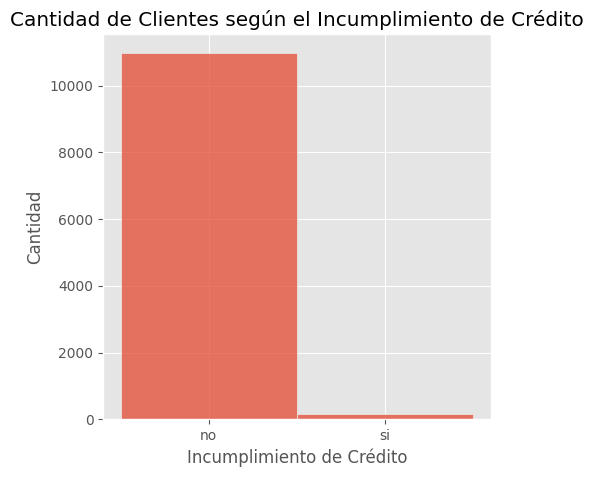

In [171]:
plt.figure(figsize=(5, 5))

sns.histplot(data=df_finanzas, x="incumplimiento_crédito")

plt.title("Cantidad de Clientes según el Incumplimiento de Crédito")
plt.xlabel("Incumplimiento de Crédito")
plt.ylabel("Cantidad")
plt.show()

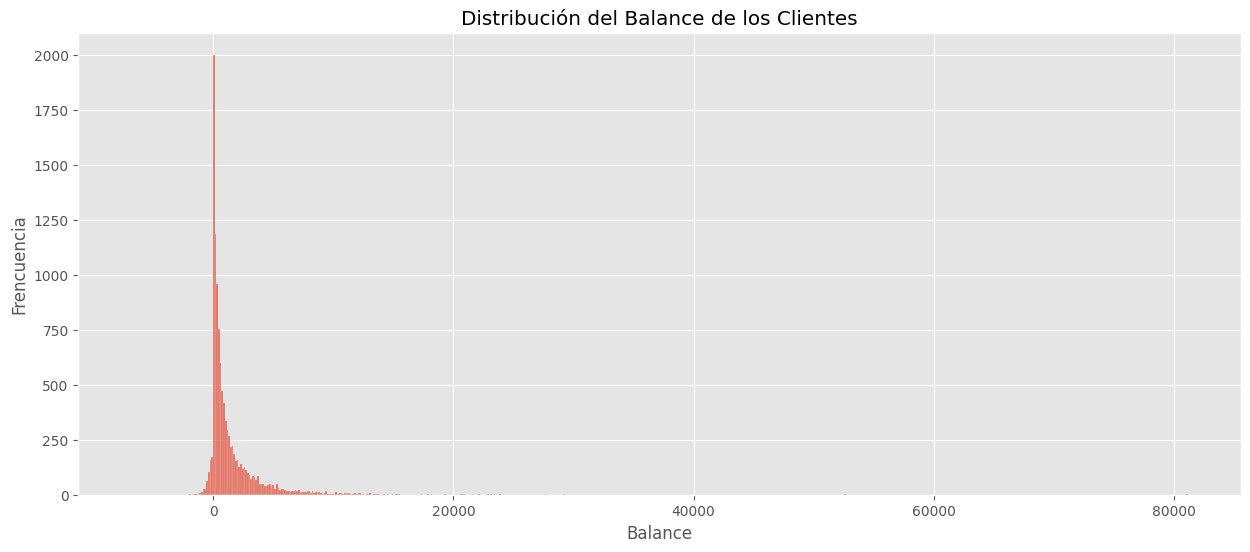

In [173]:
plt.figure(figsize=(15, 6))

sns.histplot(data=df_finanzas, x="balance")

plt.title("Distribución del Balance de los Clientes")
plt.xlabel("Balance")
plt.ylabel("Frencuencia")
plt.show()

In [161]:
con_incumplimiento_credito = df_finanzas.query('incumplimiento_crédito == "si"')

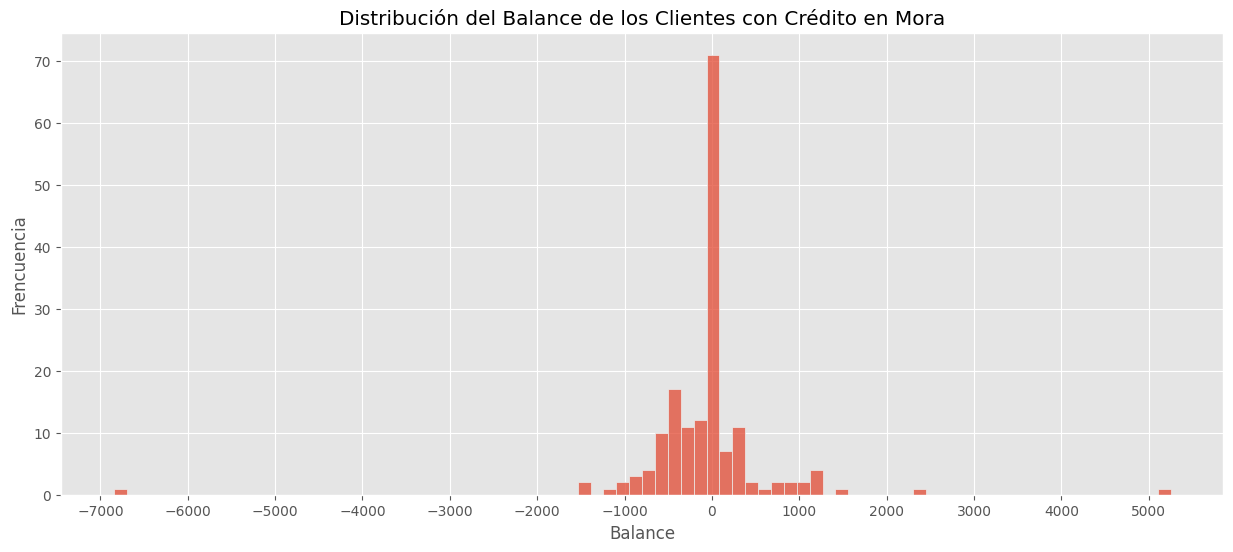

In [162]:
plt.figure(figsize=(15, 6))

sns.histplot(data=con_incumplimiento_credito, x='balance')

plt.xticks(np.arange(-7000,6000,1000))

plt.title("Distribución del Balance de los Clientes con Crédito en Mora")
plt.xlabel("Balance")
plt.ylabel("Frencuencia")
plt.show()

Confirmación de la tendencia central y la dispersión del balance de los clientes, identificación de los posibles valores atípicos

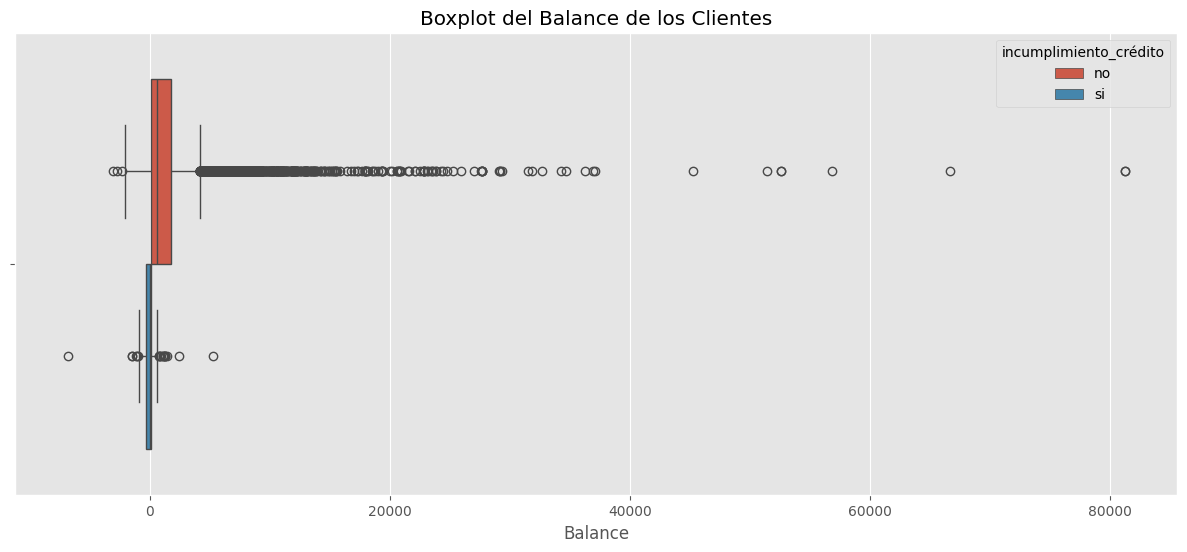

In [164]:
plt.figure(figsize=(15, 6))

sns.boxplot(data=df_finanzas, x = "balance", hue = "incumplimiento_crédito")

plt.title("Boxplot del Balance de los Clientes")
plt.xlabel("Balance")

plt.show()

## Próximos pasos -- ideas para revisar

### Agrupación de los clientes en función de su saldo para poder calcular la tasa de incumplimiento de cada grupo y ver si existe alguna tendencia
Criterio de clasificación utilizado: rango intercuartílico

In [165]:
df_finanzas['balance'].describe()

count    11162.000000
mean      1528.538524
std       3225.413326
min      -6847.000000
25%        122.000000
50%        550.000000
75%       1708.000000
max      81204.000000
Name: balance, dtype: float64

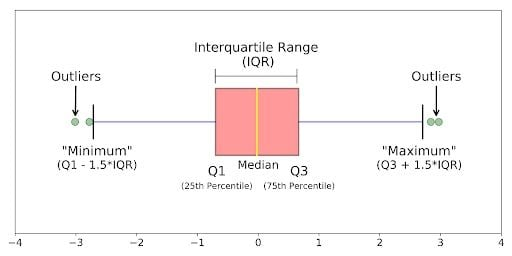

In [166]:
def cuartiles(df):
    #calcular cuartiles
    Q1 = df.quantile(0.25)
    Q2 = df.quantile(0.50)
    Q3 = df.quantile(0.75)

    #calcular IQR (rango intercuartílico)
    IQR = Q3 - Q1

    #calcular límite outliers
    min_Q = Q1 - 1.5*IQR
    max_Q = Q3 + 1.5*IQR
    
    return Q1, Q2, Q3, min_Q, max_Q

Q1, Q2, Q3, min_Q, max_Q = cuartiles(df_finanzas['balance'])

In [167]:
def clasificacion_clientes (balance):
    if balance < min_Q:
        return "muy bajo"
    elif balance < Q1:
        return "bajo"
    elif balance < Q2:
        return "medio-bajo"
    elif balance < Q3:
        return "medio-alto"
    elif balance < max_Q:
        return "alto"
    else:
        return "muy alto"
    
df_finanzas["descripcion_balance"] = df_finanzas["balance"].apply(clasificacion_clientes)

In [168]:
df_finanzas

,id,age,job,marital,education,incumplimiento_crédito,balance,housing,loan,descripcion_balance
0,1,59,admin.,married,secondary,no,2343,1,0,alto
1,3,56,admin.,married,secondary,no,45,0,0,bajo
2,4,41,technician,married,secondary,no,1270,1,0,medio-alto
3,5,55,services,married,secondary,no,2476,1,0,alto
4,6,54,admin.,married,tertiary,no,184,0,0,medio-bajo
...,...,...,...,...,...,...,...,...,...,...
11157,11159,33,blue-collar,single,primary,no,1,1,0,bajo
11158,11160,39,services,married,secondary,no,733,0,0,medio-alto
11159,11161,32,technician,single,secondary,no,29,0,0,bajo
11160,11162,43,technician,married,secondary,no,0,0,1,bajo


In [170]:
df_finanzas["descripcion_balance"].value_counts()

descripcion_balance
medio-bajo    2794
medio-alto    2793
bajo          2779
alto          1740
muy alto      1052
muy bajo         4
Name: count, dtype: int64